In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from qutip import *
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import simpson

plt.rcParams.update({'font.size': 14})

In [44]:
def coper(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*adag
    c2=sqrt(const2)*a**2
    c3=sqrt(myu)*(adag*a-0.5*adag**2)
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def hamil(N,omega,q0,myu):
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))
    return H
def retdiag(rho,N):
    rhoii=[]
    n=[]
    for i in range(N):
        rhoii.append(rho.diag())
        n.append(i+1)
    return n,rhoii
def retdens(H,cops,N):
    expop=rand_dm(N)
    times = np.linspace(0.0, 100.0, 1000)
    result_dm = mesolve(H, expop, times, cops)
    return result_dm.states    
def hamildriven(N,omega,q0,myu,n,omega1,epsilon,phi):
    T=2*np.pi/omega1
    t=np.linspace(0,1000,1000)
    t=t*T
    a=destroy(N)
    adag=a.dag()
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    H=[]
    for i in range (len(t)):
        H.append(omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(1j*epsilon*t[i]*(a+adag)))
    return H    
    #H=omega*adag*a+(1j*zeta*(adag*a**3-(adag**3)*a))+(1j*beta*(a**4-adag**4))-(1j*eta*(a**2-adag**2))-(cosine)
    
    return H
def Gauss(x, A, B, C):
    y = A*np.exp(-((x-B)/C)**2)
    return y
def twovdpcoper1(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(adag,I)
    c2=sqrt(const2)*(tensor(a**2,I))
    c3=sqrt(myu)*(tensor(adag*a,I)-0.5*tensor(adag**2,I))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
def twovdpcoper2(N,q0,myu):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    zeta=myu/12
    beta=myu/24
    eta=myu*(q0**2-1)/4
    const1=myu*(q0**2-1)
    const2=3*myu/4
    c1=sqrt(const1)*tensor(I,adag)
    c2=sqrt(const2)*(tensor(I,a**2))
    c3=sqrt(myu)*(tensor(I,adag*a)-0.5*tensor(I,adag**2))
    cops.append(c1)
    cops.append(c2)
    cops.append(c3)
    return cops
    
def twovdpcouplingcoper(cops1,cops2,N,D):
    cops=[]
    a=destroy(N)
    adag=a.dag()
    I=qeye(N)
    for i in range(len(cops1)):
        cops.append(cpos1[i])
    for i in range(len(cops2)):
        cops.append(cpos2[i])
    c3=sqrt(D)*(tensor(a,I)-tensor(I,a))
    cops.append(c3)
    return cops
def linexp(x,A,alpha,mean):
    y=A*(x**2)*np.exp(-(alpha)*(x-mean)**2)
    #y=A*x
    return y
def probrec(myu,q0,diag):
    N=3000
    p=np.zeros(N)
    #p[0]=np.random.uniform(0,1)
    #p[1]=np.random.uniform(0,1)
    p[0]=0
    p[1]=diag[0]
    p[2]=diag[1]
    #p[2]=np.random.uniform(0,1)
    n=0
    for i in range(N-3):
        p[i+3]=-(4/(3*myu*(n+2)))*(((-myu*(q0**2-1))*p[i+1])+((3*myu/4)*(n*p[i+2]))-((myu/4)*(n*p[i]+(n+2)*p[i+1])))
        n+=1
        
    return p
def coherence(dm,N):
    add=0
    s=dm.full()
    for j in range(N):
        for k in range(N):
            if (j!=k):
                add+=abs(s[j][k])
    return add
    
    
    

In [45]:
q0=3
omega=1
N=60
x=np.linspace(-8,+8,200)
p=np.linspace(-8,+8,200)

In [46]:
myu=np.linspace(0.001,4,80)
H=[]
cops=[]
ss=[]

In [47]:
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)

In [48]:
coh=[]

In [49]:
for i in range(len(myu)):
    s=ss[i]
    coh.append(coherence(s,N))

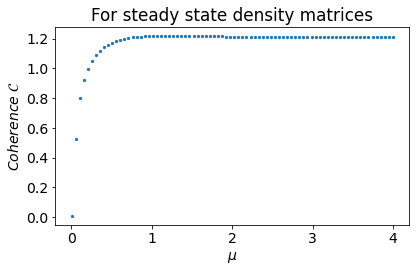

In [50]:
plt.scatter(myu,coh,s=5)
plt.ylabel(r'$Coherence$ $\mathcal{C}$')
plt.xlabel(r'$\mu$')
plt.title('For steady state density matrices')
plt,tight_layout()
plt.savefig("cohvsmu.png")

In [51]:
leftover=[]
for i in range(len(myu)):
    s=0
    steady=np.zeros((N,N))
    steady=ss[i].full()
    for l in range(N):
        for k in range(N):
            if l!=k:
                s+=abs(((-1j*omega)/myu[i])*(l-k)*steady[l][k])
    leftover.append(s)

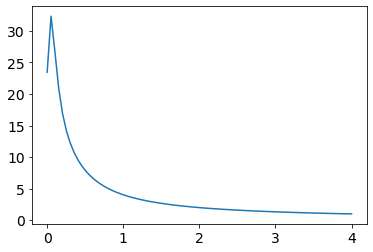

In [59]:
plt.plot(myu,leftover)

In [58]:
coh0=[]
for i in range(len(myu)):
    coh0.append(coh[i]-leftover[i])
coh0

[-23.44788349614153,
 -31.80694659107098,
 -25.989449748419926,
 -19.937317734074796,
 -15.867582446323533,
 -13.106811054960826,
 -11.115597752579637,
 -9.600332058855166,
 -8.403964048166088,
 -7.434207215766934,
 -6.632089056540444,
 -5.9580245976442106,
 -5.38429594429683,
 -4.890738212447055,
 -4.462249279959688,
 -4.087253091631924,
 -3.756713534487458,
 -3.4634721575092597,
 -3.2017873347321073,
 -2.9670044969505764,
 -2.7553147717835778,
 -2.563575040348173,
 -2.3891717065259543,
 -2.229916208976221,
 -2.083963973781464,
 -1.9497509246030587,
 -1.8259433052911656,
 -1.7113977044580457,
 -1.6051289726122941,
 -1.5062842974556447,
 -1.4141221215416246,
 -1.32799489499434,
 -1.247334885810146,
 -1.1716424431300902,
 -1.1004762400218624,
 -1.0334451226018107,
 -0.9702012695767543,
 -0.9104344261913591,
 -0.8538670233141443,
 -0.8002500290943013,
 -0.7493594095922833,
 -0.700993097780918,
 -0.6549683886563591,
 -0.6111196929022258,
 -0.5692965933926275,
 -0.5293621583994601,
 -0.491

Text(0.5, 1.0, 'For steady state density matrices')

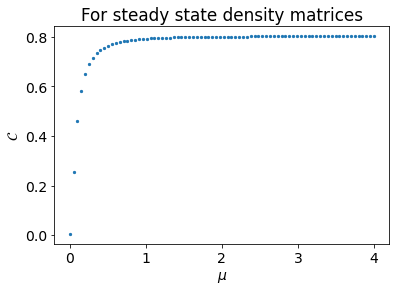

In [9]:
q0=2
omega=1
x=np.linspace(-8,+8,200)
p=np.linspace(-8,+8,200)
myu=[]
myu=np.linspace(0.001,4,80)
H=[]
cops=[]
ss=[]

for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)

coh1=[]

for i in range(len(myu)):
    s=ss[i]
    coh1.append(coherence(s,N))

plt.scatter(myu,coh1,s=5)
plt.ylabel(r'$\mathcal{C}$')
plt.xlabel(r'$\mu$')
plt.title('For steady state density matrices')
#plt.savefig("cohvsmu.png")

Text(0.5, 1.0, 'For steady state density matrices')

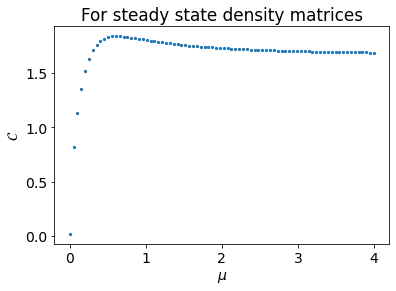

In [10]:
q0=4
omega=1
x=np.linspace(-8,+8,200)
p=np.linspace(-8,+8,200)
myu=[]
myu=np.linspace(0.001,4,80)
H=[]
cops=[]
ss=[]

for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)

coh2=[]

for i in range(len(myu)):
    s=ss[i]
    coh2.append(coherence(s,N))

plt.scatter(myu,coh2,s=5)
plt.ylabel(r'$\mathcal{C}$')
plt.xlabel(r'$\mu$')
plt.title('For steady state density matrices')
#plt.savefig("cohvsmu.png")

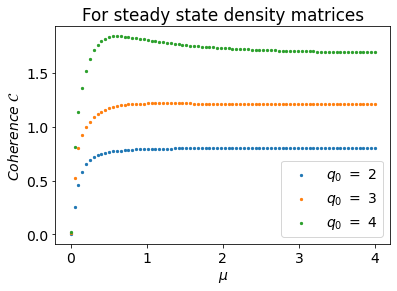

In [11]:
plt.scatter(myu,coh1,s=5,label=r'$q_0$ $=$ $2$')
plt.scatter(myu,coh,s=5,label=r'$q_0$ $=$ $3$')
plt.scatter(myu,coh2,s=5,label=r'$q_0$ $=$ $4$')
plt.ylabel(r'$Coherence$ $\mathcal{C}$')
plt.xlabel(r'$\mu$')
plt.title('For steady state density matrices')
plt.legend()
plt.savefig("cohvsmudiffq0.png")

In [12]:
c1=max(coh)
c1

1.2171049510717629

In [13]:
myu[coh.index(c1)]

1.215886075949367

In [14]:
coh

[0.009789187790532913,
 0.5259575529209196,
 0.8021159256360848,
 0.9238530432821079,
 0.9957390110705308,
 1.0474792692590473,
 1.0869801289998586,
 1.1174717215106171,
 1.1410810672930343,
 1.159372222140297,
 1.1735119174995154,
 1.1844083035894253,
 1.1927787938643446,
 1.199186820301905,
 1.2040725761096416,
 1.2077783498747676,
 1.2105695408676866,
 1.21265164226975,
 1.2141837194895821,
 1.2152889725390348,
 1.2160629400856444,
 1.216579833759904,
 1.2168974108724577,
 1.217060715759668,
 1.2171049510717629,
 1.2170576826438728,
 1.2169405349954052,
 1.2167704977405724,
 1.2165609346475967,
 1.2163223651565176,
 1.2160630714396667,
 1.2157895713843863,
 1.2155069882513918,
 1.2152193404733,
 1.2149297695382475,
 1.2146407197183524,
 1.2143540802243036,
 1.2140712979481072,
 1.2137934671098296,
 1.2135214007110746,
 1.2132556876139065,
 1.2129967382287505,
 1.2127448211499987,
 1.2125000925783966,
 1.2122626199807238,
 1.2120324011345196,
 1.2118093794683789,
 1.2115934564223945,

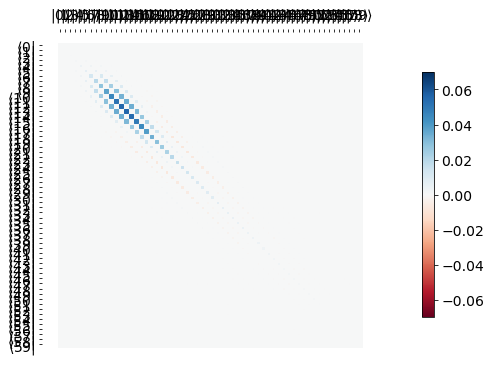

In [15]:
abs(ss[79])
fig, ax = hinton(ss[79])
plt.show()

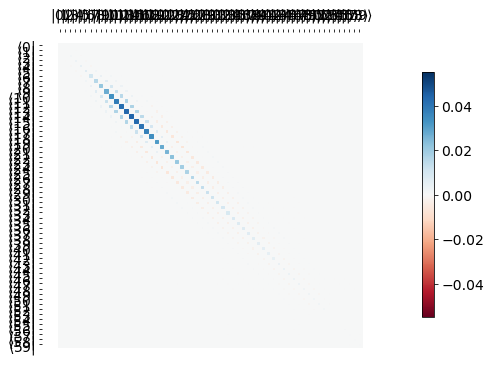

In [16]:
abs(ss[2])
fig, ax = hinton(ss[2])
plt.show()

In [17]:
taulist=np.linspace(0,10000,10000)
wlist1 = np.linspace(0,2, 10000)
a=destroy(N)
adag=a.dag()

In [18]:
myu[10]

0.5072025316455696

In [19]:
spec1 = spectrum(H[10], wlist1, cops[10], a.dag(), a)

In [20]:
for i in range(len(spec1)):
    if spec1[i]==max(spec1):
        w=wlist1[i]
        break
w

0.7178717871787179

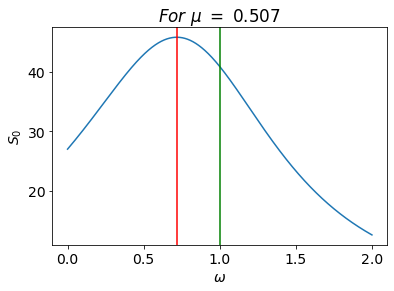

In [21]:
plt.plot(wlist1,spec1)
plt.axvline(omega,color='g')
plt.axvline(w,color='r')
#plt.xlim(0,1.05)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_0$')
plt.title(r'$For$ $\mu$ $=$ $0.507$')
plt.tight_layout()
plt.savefig('smallmupower.png')

In [22]:
myu[40]

2.0258101265822783

In [23]:
spec2 = spectrum(H[40], wlist1, cops[40], a.dag(), a)

In [24]:
for i in range(len(spec2)):
    if spec2[i]==max(spec2):
        w=wlist1[i]
        break
w

0.2528252825282528

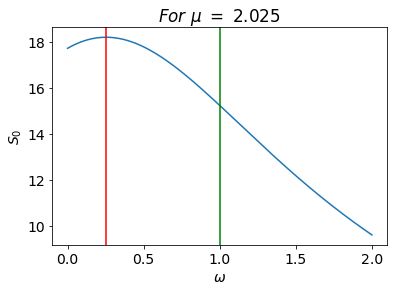

In [25]:
plt.plot(wlist1,spec2)
plt.axvline(omega,color='g')
plt.axvline(w,color='r')
#plt.xlim(0,1.05)
plt.xlabel(r'$\omega$')
plt.ylabel(r'$S_0$')
plt.title(r'$For$ $\mu$ $=$ $2.025$')
plt.savefig('largemupower.png')

In [26]:
leftover=[]
for i in range(len(myu)):
    s=0
    steady=np.zeros((N,N))
    steady=ss[i].full()
    for l in range(N):
        for k in range(N):
            if l!=k:
                s+=abs(((-1j*omega)/myu[i])*(l-k)*steady[l][k])
    leftover.append(s)
                

In [27]:
leftover

[43.376903623966435,
 55.23100028391759,
 40.32580766841492,
 32.686973318196976,
 27.71828472806789,
 23.938123582186407,
 20.92173297600685,
 18.467199001774645,
 16.44414702368301,
 14.759237771920203,
 13.342871168773046,
 12.142068079644217,
 11.115901912324805,
 10.232396607767154,
 9.466336280434875,
 8.797674154855285,
 8.210354265499916,
 7.691426720062255,
 7.230376476928912,
 6.818609889925592,
 6.449059169012763,
 6.115875739920917,
 5.814191099635801,
 5.539929232029172,
 5.289658632721006,
 5.060474926764385,
 4.8499072402407695,
 4.65584311232744,
 4.47646795401176,
 4.310215979029079,
 4.155730228832199,
 4.011829843003765,
 3.877483131194543,
 3.7517853132982,
 3.6339400341005605,
 3.52324394417326,
 3.4190737829816555,
 3.320875512178998,
 3.2281551337767693,
 3.1404708988849515,
 3.0574266789308933,
 2.9786663164180296,
 2.903868786787472,
 2.8327440310850283,
 2.7650293558546415,
 2.700486316464152,
 2.638898011837512,
 2.5800667294799826,
 2.5238118895406307,
 2.46

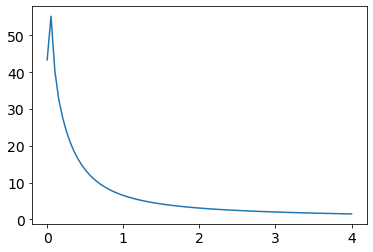

In [28]:
plt.plot(myu,leftover)

In [29]:
q0=2
H=[]
cops=[]
ss=[]
coh=[]
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)
for i in range(len(myu)):
    s=ss[i]
    coh.append(coherence(s,N))


Text(0.5, 0, '$\\mu$')

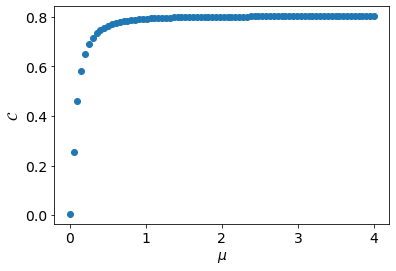

In [30]:
plt.scatter(myu,coh)
plt.ylabel(r'$\mathcal{C}$')
plt.xlabel(r'$\mu$')
#plt.title('For steady state density matrices')
#plt.savefig("cohvsmu.png")

In [31]:
c2=max(coh)
c2

0.8029102486876547

In [32]:
myu[coh.index(c2)]

4.0

In [33]:
c1-c2

0.41419470238410816

In [34]:
q0=1
H=[]
cops=[]
ss=[]
coh=[]
for i in range(len(myu)):
    m=myu[i]
    h=hamil(N,omega,q0,m)
    c=coper(N,q0,m)
    s=steadystate(h,c)
    H.append(h)
    cops.append(c)
    ss.append(s)
for i in range(len(myu)):
    s=ss[i]
    coh.append(coherence(s,N))


Text(0.5, 0, '$\\mu$')

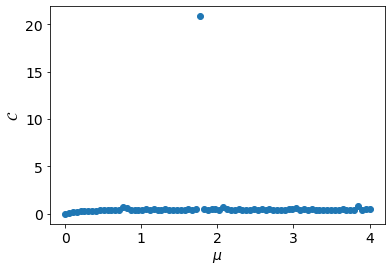

In [35]:
plt.scatter(myu,coh)
plt.ylabel(r'$\mathcal{C}$')
plt.xlabel(r'$\mu$')
#plt.title('For steady state density matrices')
#plt.savefig("cohvsmu.png")

In [36]:
c3=max(coh)
c3

20.83525293258866

In [37]:
myu[coh.index(c3)]

1.7727088607594936

In [38]:
c2-c3

-20.032342683901003

In [39]:
times = np.linspace(0.0, 100.0, 1000)

In [40]:
dm1=retdens(H[0],cops[0],N)
coh1=[]

In [41]:
for i in range(len(times)):
    s=dm1[i]
    coh1.append(coherence(s,N))
    

(-1.0, 60.0)

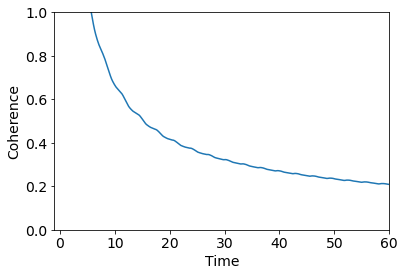

In [42]:
plt.plot(times,coh1)
plt.xlabel('Time')
plt.ylabel('Coherence')
plt.ylim(0,1)
plt.xlim(-1,60)